# Inspect statistical power of automated V&V

Did this in a somewhat manual way, but I don't expect this to be a common task.
It's more of a first-time exploration of whether these methods are working as intended.
I ran automated V&V and got the diagnostic outputs, for a number of different population sizes.
Then I analyzed them here to look at the relationship between population size and power.

In [1]:
import pandas as pd, numpy as np

In [2]:
proportion_tests = pd.concat([
    pd.read_csv('proportion_tests_500.csv').assign(population_size=500),
    pd.read_csv('proportion_tests_5k.csv').assign(population_size=5_000),
    pd.read_csv('proportion_tests_50k.csv').assign(population_size=50_000),
    pd.read_csv('proportion_tests_250k.csv').assign(population_size=250_000),
    pd.read_csv('proportion_tests_500k.csv').assign(population_size=500_000),
], ignore_index=True)
proportion_tests

,name,name_addl,proportion,numerator,denominator,true_value_min,true_value_max,p_value,test_significance_level,reject_null,rejection_area_low_max,rejection_area_high_min,powered_value_lb,powered_value_ub,population_size
0,Individual migration rate,Time step 0,0.002000,1,500,0.004152,0.004152,0.729172,0.000072,False,-1.0,10.0,0.000000,0.024949,500
1,Individual migration rate,Time step 1,0.004000,2,500,0.004111,0.004194,1.000000,0.000072,False,-1.0,10.0,0.000000,0.024949,500
2,Individual migration rate,Time step 2,0.005976,3,502,0.004070,0.004236,0.486664,0.000072,False,-1.0,11.0,0.000000,0.027094,500
3,Individual migration rate,Time step 3,0.001984,1,504,0.004029,0.004278,0.762835,0.000072,False,-1.0,11.0,0.000000,0.026986,500
4,Individual migration rate,Time step 4,0.001976,1,506,0.003989,0.004321,0.774277,0.000072,False,-1.0,11.0,0.000000,0.026880,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,State proportion for 55,Time step 10,0.019104,3825,200225,0.011636,0.031657,1.000000,0.000072,False,2138.0,6648.0,0.010494,0.033539,500000
3456,State proportion for 56,Time step 10,0.001858,372,200225,0.001141,0.003105,1.000000,0.000072,False,169.0,722.0,0.000799,0.003718,500000
3457,GQ immigration stochastic rounding,NaN,0.700000,7,10,0.733510,0.733510,0.732192,0.000072,False,1.0,11.0,0.157635,1.000000,500000
3458,Non-reference-person immigration stochastic ro...,NaN,0.900000,9,10,0.717493,0.717493,0.300424,0.000072,False,0.0,11.0,0.000000,1.000000,500000


In [3]:
# Taking the mean values for the same test across timesteps
aggregated = proportion_tests.groupby(['population_size', 'name']).agg({'true_value_min': 'mean', 'true_value_max': 'mean', 'powered_value_lb': 'mean', 'powered_value_ub': 'mean'})
aggregated

true_value_min  \
population_size name                                                                 
500             Domestic migration creating new households                0.001451   
                Domestic migration into GQ                                0.000796   
                Domestic migration into GQ from GQ                        0.015000   
                Domestic migration into existing households               0.001723   
                Domestic migration joining recently created hou...        0.000000   
...                                                                            ...   
500000          State proportion for 55                                   0.015237   
                State proportion for 56                                   0.001494   
                State proportion for 6                                    0.083960   
                State proportion for 8                                    0.013696   
                State proportion for 9                                    0.008877   

                                                                    true_value_max  \
population_size name                                                                 
500             Domestic migration creating new households                0.001588   
                Domestic migration into GQ                                0.000871   
                Domestic migration into GQ from GQ                        0.100000   
                Domestic migration into existing households               0.001885   
                Domestic migration joining recently created hou...        0.001000   
...                                                                            ...   
500000          State proportion for 55                                   0.025101   
                State proportion for 56                                   0.002462   
                State proportion for 6                                    0.138312   
                State proportion for 8                                    0.022562   
                State proportion for 9                                    0.014624   

                                                                    powered_value_lb  \
population_size name                                                                   
500             Domestic migration creating new households                  0.000000   
                Domestic migration into GQ                                  0.000000   
                Domestic migration into GQ from GQ                          0.000000   
                Domestic migration into existing households                 0.000000   
                Domestic migration joining recently created hou...          0.000000   
...                                                                              ...   
500000          State proportion for 55                                     0.013932   
                State proportion for 56                                     0.001101   
                State proportion for 6                                      0.080974   
                State proportion for 8                                      0.012458   
                State proportion for 9                                      0.007884   

                                                                    powered_value_ub  
population_size name                                                                  
500             Domestic migration creating new households                  0.017880  
                Domestic migration into GQ                                  0.015574  
                Domestic migration into GQ from GQ                          1.000000  
                Domestic migration into existing households                 0.018556  
                Domestic migration joining recently created hou...          0.015574  
...                                                                         

In [4]:
aggregated.loc[(slice(None), 'Individual migration rate'), :]

,,true_value_min,true_value_max,powered_value_lb,powered_value_ub
population_size,name,,,,
500,Individual migration rate,0.00397,0.004344,0.000000,0.026432
5000,Individual migration rate,0.00397,0.004344,0.000776,0.009631
50000,Individual migration rate,0.00397,0.004344,0.002719,0.005835
250000,Individual migration rate,0.00397,0.004344,0.003386,0.004992
500000,Individual migration rate,0.00397,0.004344,0.003553,0.004798


In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker

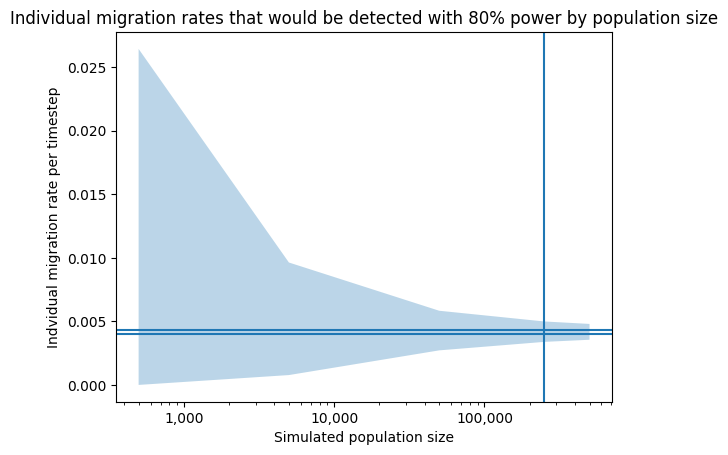

In [6]:
fig, ax = plt.subplots(1, 1)
plot_data = aggregated.loc[(slice(None), 'Individual migration rate'), :].reset_index()
ax.fill_between(plot_data.population_size, plot_data.powered_value_lb, plot_data.powered_value_ub, alpha=0.3)

# True value range from V&V inputs
assert plot_data.true_value_min.nunique() == 1
assert plot_data.true_value_max.nunique() == 1
plt.axhline(plot_data.true_value_min.iloc[0])
plt.axhline(plot_data.true_value_max.iloc[0])

# Our typical test population size
plt.axvline(x=250_000)

ax.set_title('Individual migration rates that would be detected with 80% power by population size')
ax.set_ylabel('Indvidual migration rate per timestep')
ax.set_xlabel('Simulated population size')

ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,g}'))